# Predictive Modeling of Stock Data
By Shahbab Ahmed, Isaiah Erven, Amirul Miah, and Tanbirul Miah

Created for SI 370

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
def create_stock_df(stock):
    with open('Stocks/' + stock + ".us.txt") as f:
        lines = f.readlines()
        stock_data = pd.DataFrame(lines)
        f.close()
        
    
    stock_dict = {"Date":[], "Open":[], "High":[], "Low":[], "Close":[], "Volume":[]}
        
    for i in lines[1:]:
        
        #create variables by splitting and slicing data
        Date = i.split(",")[:][0]
        Open = i.split(",")[:][1]
        High = i.split(",")[:][2]
        Low = i.split(",")[:][3]
        Close = i.split(",")[:][4]
        Volume = i.split(",")[:][5]
        OpenInt = i.split(",")[:][6]
        
        #appending data to stock_dict keys
        stock_dict["Date"].append(Date)
        stock_dict["Open"].append(Open)
        stock_dict["High"].append(High)
        stock_dict["Low"].append(Low)
        stock_dict["Close"].append(Close)
        stock_dict["Volume"].append(Volume)
        
    stock_df = pd.DataFrame(stock_dict)
    stock_df = stock_df.set_index("Date")
    
    #adds average of open,high,low,and close
    stock_df["Average Price"] = stock_df.iloc[:,:3].astype(float).mean(axis=1)
    return stock_df

In [20]:
aapl = create_stock_df("aapl")
amzn = create_stock_df("amzn")
nflx = create_stock_df("nflx")
googl = create_stock_df("googl")
fb = create_stock_df("fb")
msft = create_stock_df("msft")

In [41]:
aapl[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = aapl[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)
amzn[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = amzn[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)
nflx[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = nflx[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)
googl[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = googl[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)
fb[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = fb[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)
msft[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']] = msft[['Open', 'High', 'Low', 'Close', 'Volume', 'Average Price']].apply(pd.to_numeric, axis = 1)

In [19]:
aapl

,Open,High,Low,Close,Volume,Average Price
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0.423880
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0.420900
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0.429000
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0.425590
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0.439687
...,...,...,...,...,...,...
2017-11-06,171.75,174.36,171.1,173.63,34901241,172.403333
2017-11-07,173.29,174.51,173.29,174.18,24424877,173.696667
2017-11-08,174.03,175.61,173.71,175.61,24451166,174.450000


In [50]:
display(aapl.shape)
display(aapl.nunique())
display(aapl.describe())

(8364, 6)

Open             4333
High             4330
Low              4334
Close            4431
Volume           7992
Average Price    7736
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.000000
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,22.278154
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,37.755461
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.233067
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,1.139175
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,1.630133
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,23.642833
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,174.920000


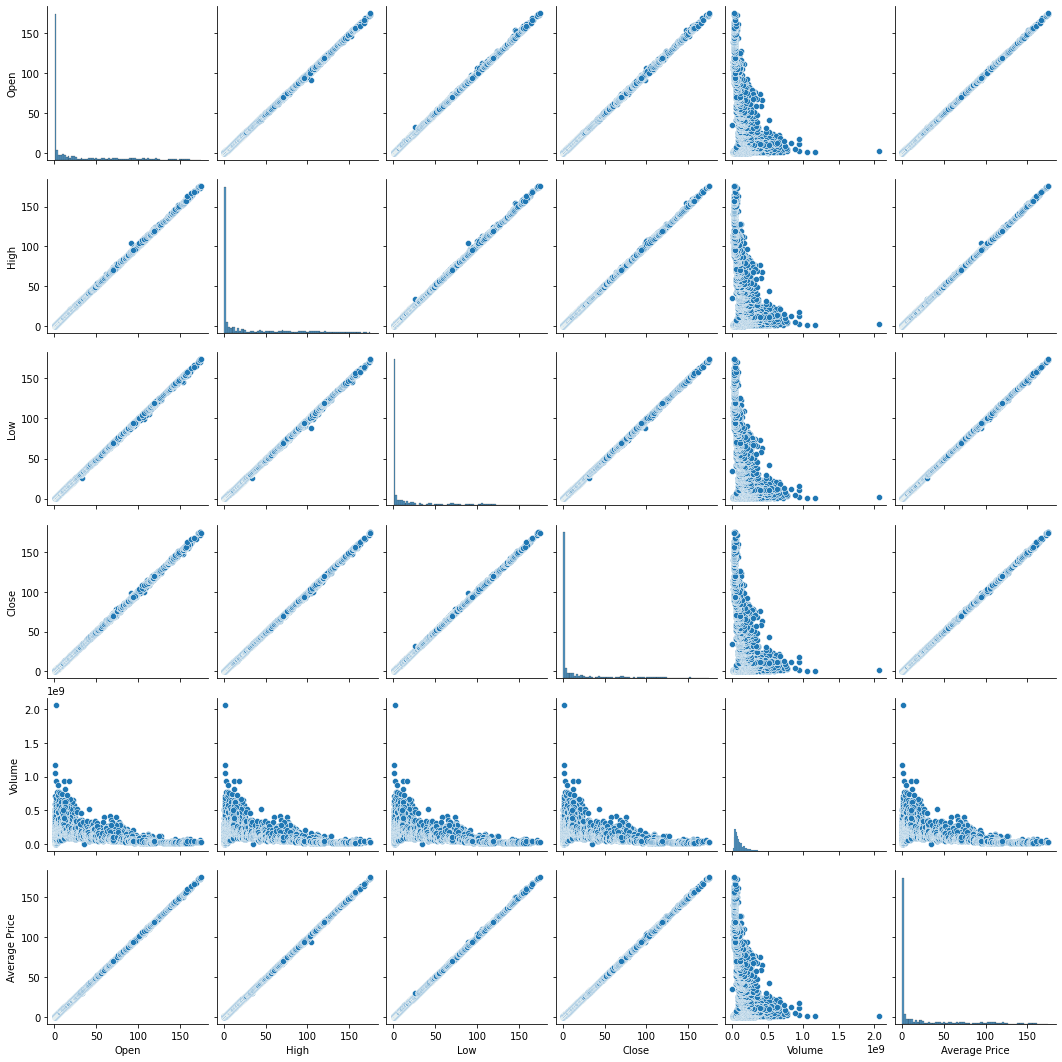

In [73]:
sns.pairplot(aapl)

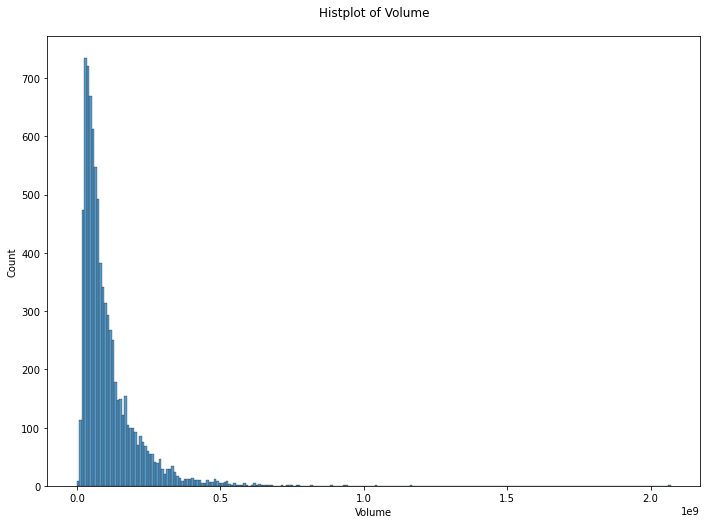

In [57]:
sns.histplot(aapl['Volume']).set_title('Histplot of Volume', pad=20)
rcParams['figure.figsize'] = 11.7,8.27

In [54]:
display(amzn.shape)
display(amzn.nunique())
display(amzn.describe())

(5153, 6)

Open             4388
High             4339
Low              4330
Close            4443
Volume           5138
Average Price    4969
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,5153.000000,5153.000000,5153.000000,5153.000000,5.153000e+03,5153.000000
mean,181.747357,183.880652,179.466684,181.769343,7.837325e+06,181.698231
std,239.611052,241.226109,237.638139,239.548391,7.594745e+06,239.485347
min,1.410000,1.450000,1.310000,1.400000,0.000000e+00,1.400000
25%,35.500000,36.130000,35.000000,35.550000,3.779449e+06,35.526667
50%,70.900000,72.750000,69.020000,70.700000,5.902992e+06,70.873333
75%,242.850000,245.770000,240.670000,243.880000,8.888949e+06,243.476667
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,1127.303333


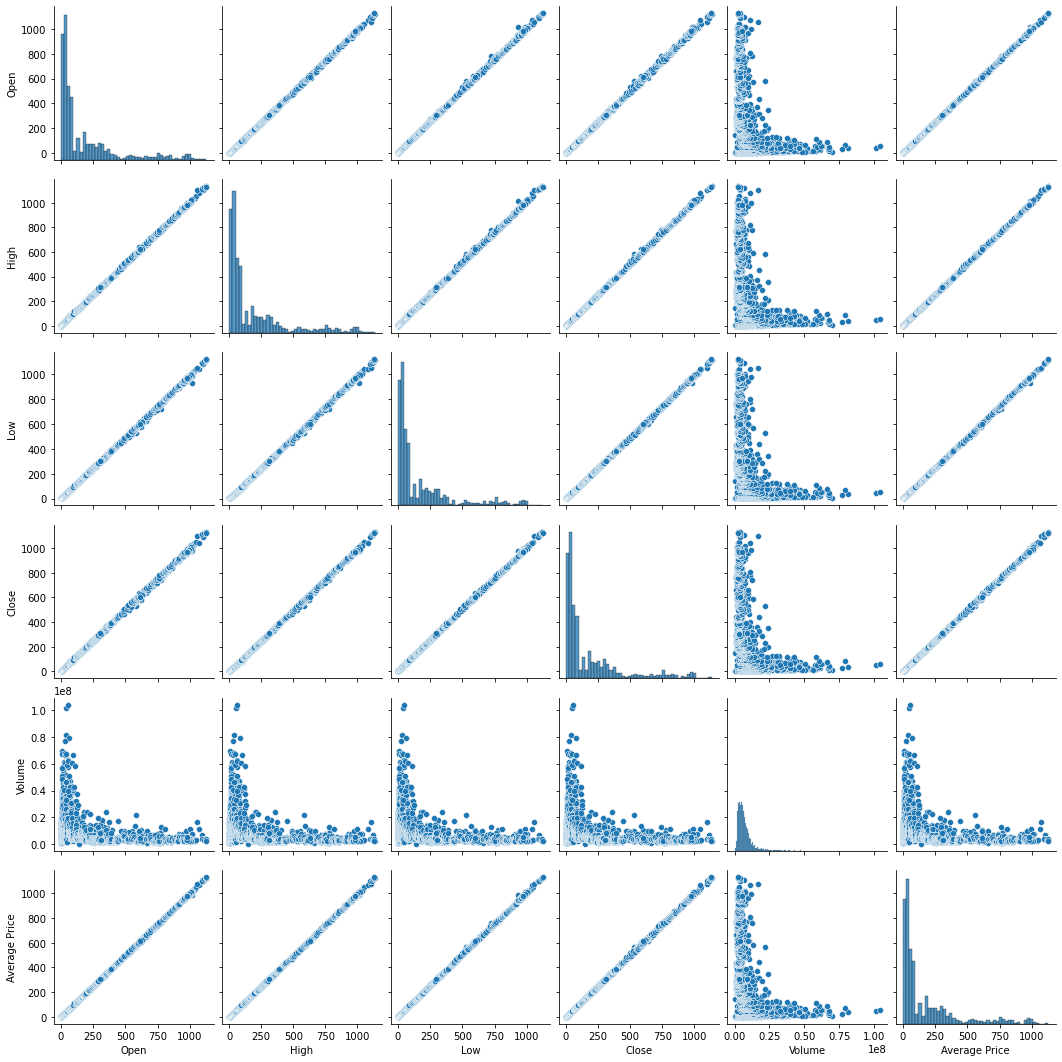

In [55]:
sns.pairplot(amzn)

Text(0.5, 1.0, 'Histplot of Volume')

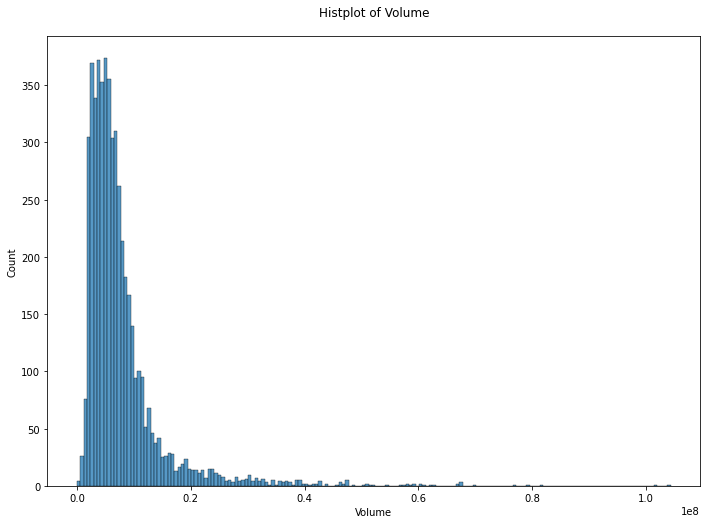

In [58]:
sns.histplot(amzn['Volume']).set_title('Histplot of Volume', pad=20)

In [59]:
display(nflx.shape)
display(nflx.nunique())
display(nflx.describe())

(3201, 6)

Open             2868
High             2873
Low              2848
Close            2908
Volume           3199
Average Price    3152
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.000000
mean,39.503433,40.097952,38.894024,39.521347,1.953107e+07,39.498470
std,47.567814,48.144119,46.939669,47.573338,2.056067e+07,47.547554
min,1.300000,1.317100,1.272900,1.290000,1.493632e+06,1.297133
25%,4.142900,4.212900,4.074300,4.141400,7.663600e+06,4.145267
50%,15.493000,15.807000,15.079000,15.447000,1.321464e+07,15.415333
75%,60.933000,61.743000,60.330000,61.129000,2.375344e+07,61.007667
max,201.950000,204.380000,198.090000,202.680000,3.154350e+08,200.880000


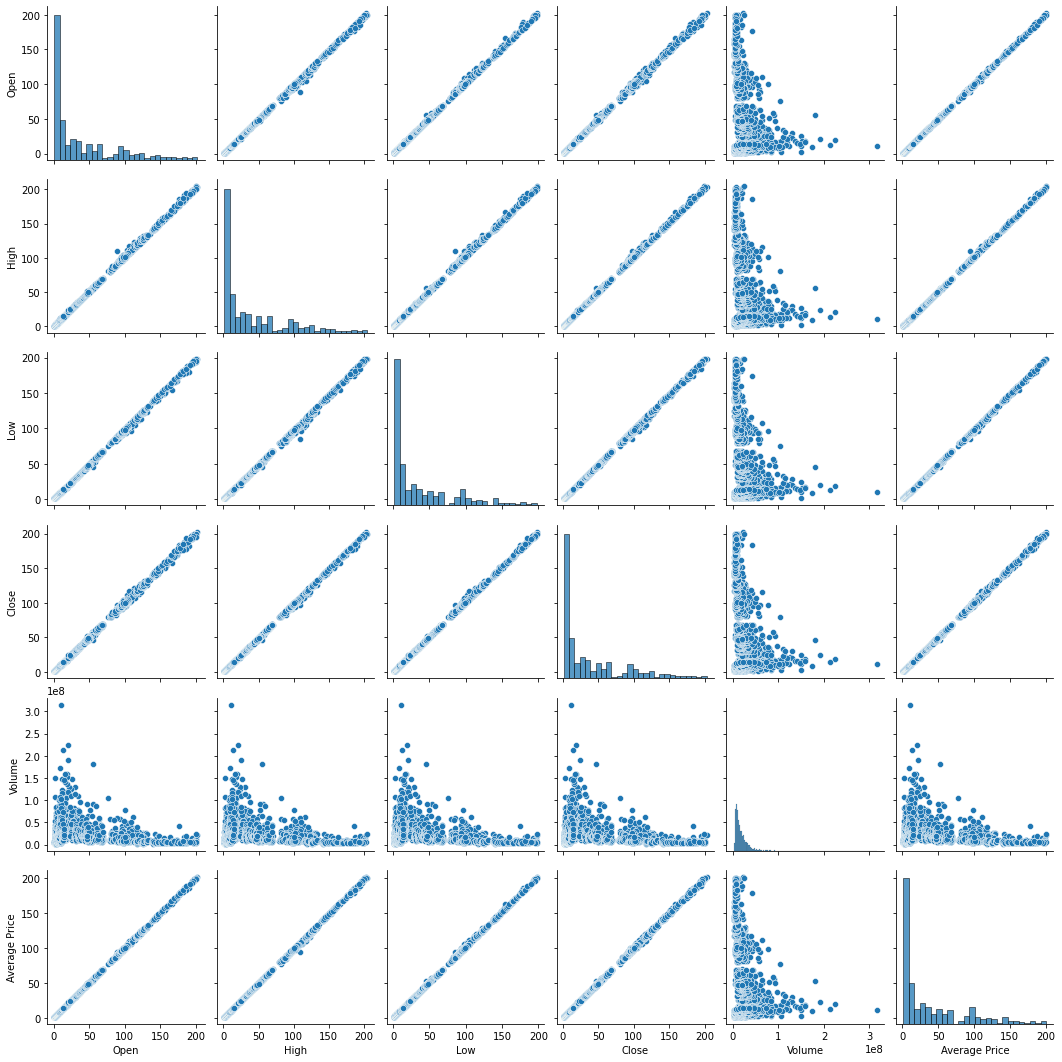

In [60]:
sns.pairplot(nflx)

Text(0.5, 1.0, 'Histplot of Volume')

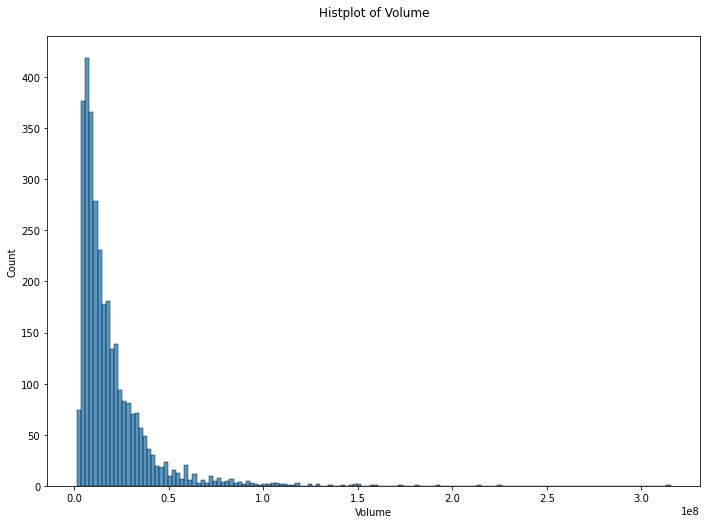

In [61]:
sns.histplot(nflx['Volume']).set_title('Histplot of Volume', pad=20)

In [62]:
display(googl.shape)
display(googl.nunique())
display(googl.describe())

(3333, 6)

Open             3166
High             3129
Low              3150
Close            3179
Volume           3326
Average Price    3306
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.000000
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06,389.861332
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06,235.012741
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00,50.003333
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06,228.350000
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06,295.220000
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07,550.320000
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07,1053.263333


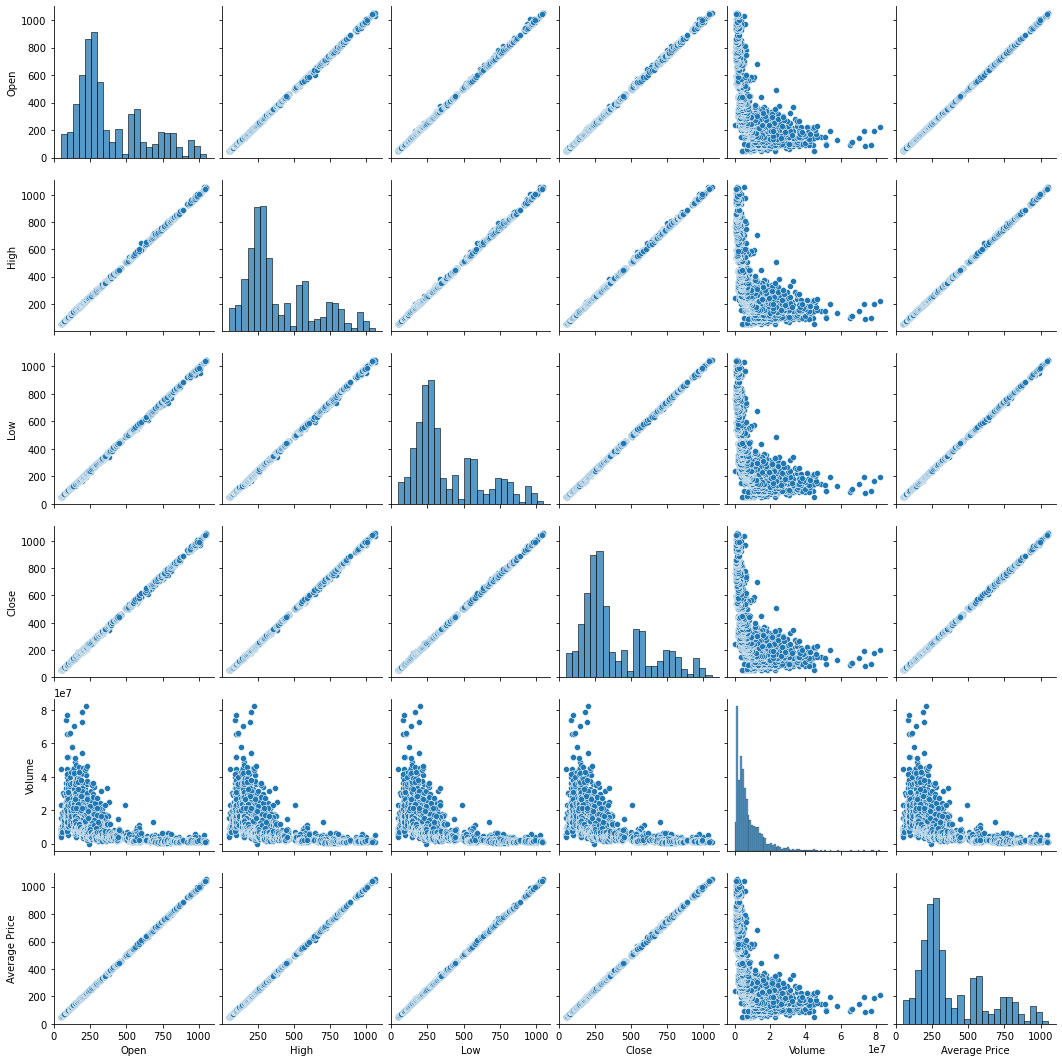

In [63]:
sns.pairplot(googl)

Text(0.5, 1.0, 'Histplot of Volume')

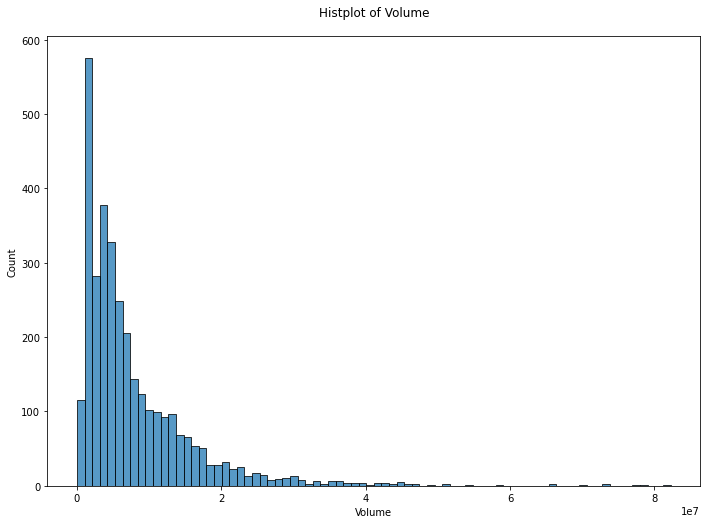

In [64]:
sns.histplot(googl['Volume']).set_title('Histplot of Volume', pad=20)

In [65]:
display(fb.shape)
display(fb.nunique())
display(fb.describe())

(1381, 6)

Open             1284
High             1286
Low              1275
Close            1298
Volume           1381
Average Price    1364
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03,1381.000000
mean,83.543667,84.384940,82.630555,83.543827,3.770716e+07,83.519721
std,43.981535,44.161698,43.756570,44.015093,3.294912e+07,43.963461
min,18.080000,18.270000,17.550000,17.730000,5.913000e+06,17.966667
25%,46.750000,47.530000,45.960000,46.700000,1.843043e+07,46.820000
50%,78.600000,79.690000,77.930000,78.790000,2.812660e+07,78.723333
75%,117.710000,118.600000,116.700000,117.650000,4.601640e+07,117.696667
max,182.360000,182.900000,180.570000,182.660000,5.804384e+08,181.943333


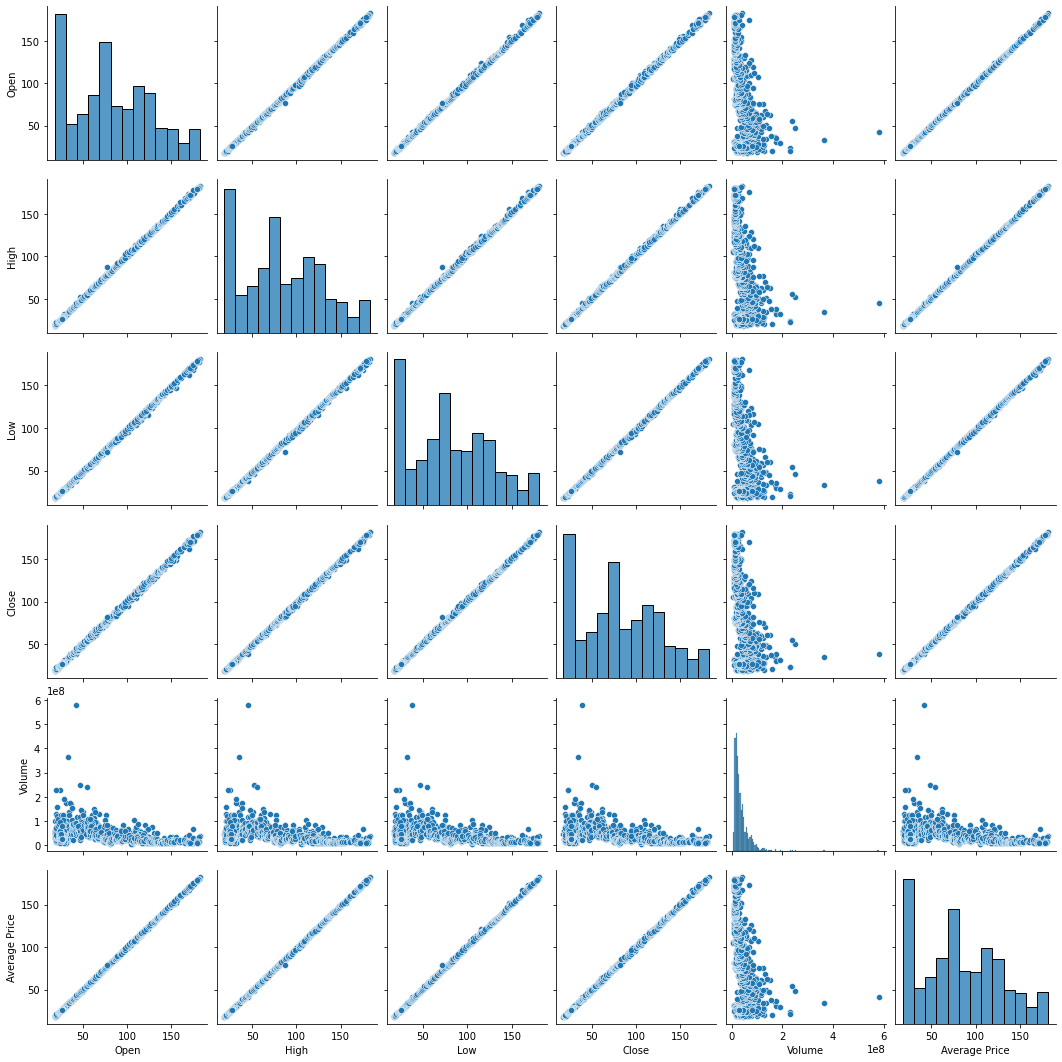

In [66]:
sns.pairplot(fb)

Text(0.5, 1.0, 'Histplot of Volume')

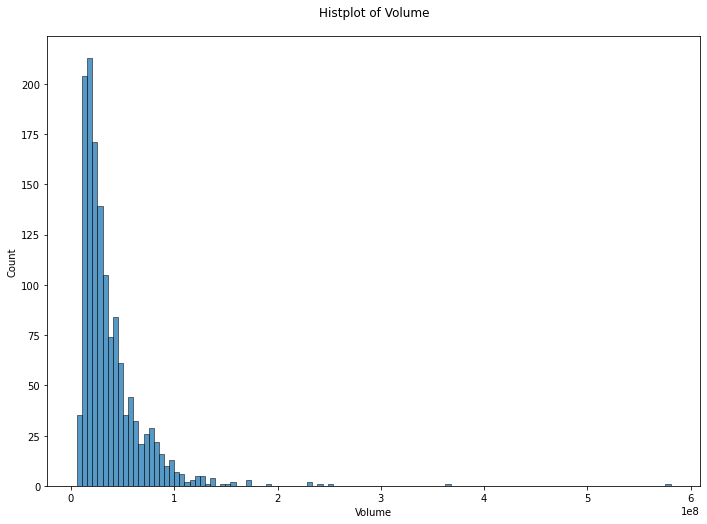

In [67]:
sns.histplot(fb['Volume']).set_title('Histplot of Volume', pad=20)

In [68]:
display(msft.shape)
display(msft.nunique())
display(msft.describe())

(7983, 6)

Open             3654
High             3623
Low              3635
Close            3669
Volume           7833
Average Price    6770
dtype: int64

,Open,High,Low,Close,Volume,Average Price
count,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7983.000000
mean,18.977859,19.187219,18.773635,18.984698,7.945800e+07,18.979571
std,16.416068,16.552604,16.277882,16.424012,5.214889e+07,16.414761
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.067200
25%,2.113300,2.155100,2.079700,2.113300,4.910587e+07,2.113183
50%,20.462000,20.697000,20.251000,20.469000,7.059385e+07,20.474667
75%,25.475000,25.754000,25.233000,25.483500,9.734927e+07,25.512333
max,84.770000,86.200000,84.082500,84.560000,1.371331e+09,84.726667


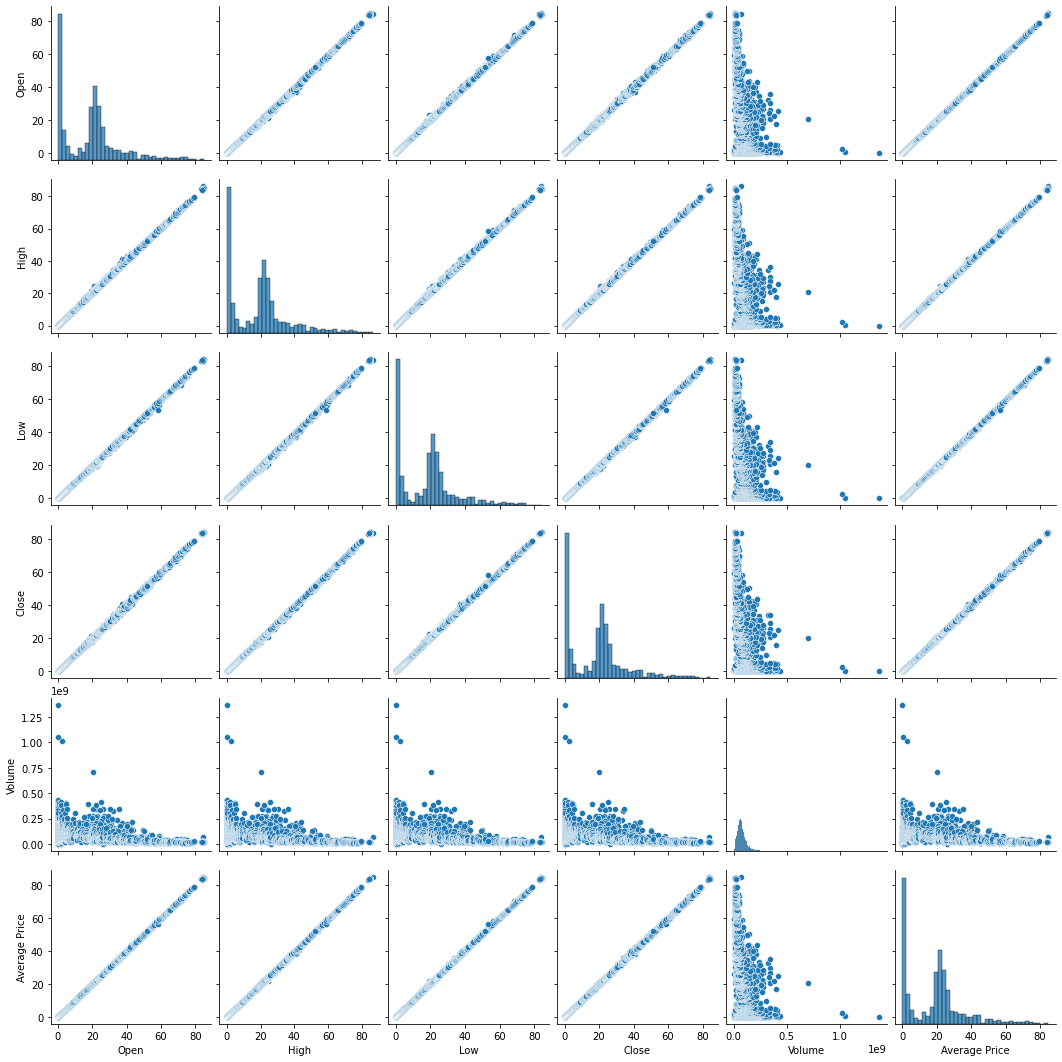

In [69]:
sns.pairplot(msft)

Text(0.5, 1.0, 'Histplot of Volume')

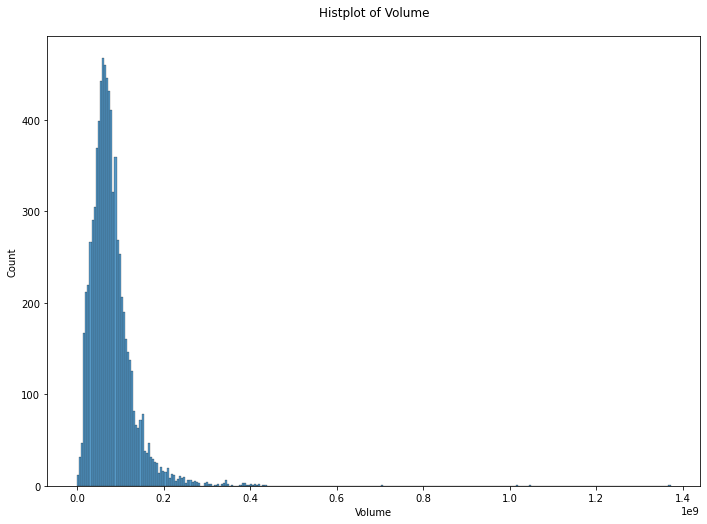

In [72]:
sns.histplot(msft['Volume']).set_title('Histplot of Volume', pad=20)

### Technical Indicators

In [5]:
import pandas as pd
import numpy as np
import talib

"""
TA Functions
Parameters
----------
df : DataFrame
timeperiod : int
    The last x amount of days

Returns
-------
Copy of dataframe we passed in plus a new column containing the respective indicator we called
"""

def add_ATR(df, timeperiod=1):
    temp = df.copy()
    temp['ATR_{}'.format(timeperiod)] = talib.ATR(df.iloc[:, 0], df.iloc[:, 0], df.iloc[:, 0], timeperiod=timeperiod)
    return temp

def add_RSI(df, timeperiod=1):
    temp = df.copy()
    temp['RSI_{}'.format(timeperiod)] = talib.RSI(df.iloc[:, 0], timeperiod=timeperiod)
    return temp

def add_SMA(df, timeperiod=1):

    temp = df.copy()
    temp['SMA_{}'.format(timeperiod)] = talib.SMA(df.iloc[:, 0], timeperiod)
    return temp

def add_EMA(df, timeperiod=1):

    temp = df.copy()
    temp['EMA_{}'.format(timeperiod)] = talib.EMA(df.iloc[:, 0], timeperiod)
    return temp

def add_OBV(df):
    
    temp = df.copy()
    temp['OBV'] = talib.OBV(df.iloc[:, 0], df["Volume"])
    return temp

ModuleNotFoundError: No module named 'talib'

In [ ]:
stock_df = create_stock_df("a")

In [ ]:
stock_df

In [ ]:
def add_ta(df, timeperiod):
    df = add_ATR(df,timeperiod)
    df = add_RSI(df,timeperiod)
    df = add_SMA(df,timeperiod)
    df = add_EMA(df,timeperiod)
    df = add_OBV(df)
    
    return df

In [ ]:
stock_df = add_ta(stock_df,2)

In [ ]:
stock_df

# Train/Test Split

In [ ]:
stock_df = stock_df.dropna()
#features
X = stock_df.drop(columns=["Average Price"])
#target
y = stock_df[["Average Price"]]

In [ ]:
from sklearn.model_selection import train_test_split

#set shuffle=False since we're working with timeseries and should not randomize dates for stock data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=False)

# Principal Components Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


y_standardized = pd.DataFrame(scaler.fit_transform(X.dropna()), columns=X.columns)
y_standardized

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

pc_scores = pca.fit_transform(y_standardized)
pc_scores = pd.DataFrame(pc_scores, columns=['PC' + str(i) for i in np.arange(1, y_standardized.shape[1] + 1)])
pc_scores.head()

In [ ]:
sns.set(rc={"figure.figsize":(8, 4)})

scree_data = pd.DataFrame({'Principal Component': ['1', '2', '3', '4', '5', '6', '7', '8', '9','10'], 'Prop Variance Explained': pca.explained_variance_ratio_})
sns.set(rc={"figure.figsize":(18, 6)})
sns.pointplot(x='Principal Component', y='Prop Variance Explained', data=scree_data).set_title('Scree plot')

l = []
for i in range(8):
    l.append(1/(i+1))
    
sns.pointplot(x='Principal Component', y='Prop Variance Explained', color='#a0522d', data=pd.DataFrame([{'Principal Component':(i + 1), 'Prop Variance Explained': (np.sum(l[i:8]) / 8)} for i in range(8)])).set_title('Scree plot')

In [ ]:
plt.figure(1)
sns.barplot(x=np.abs(pca.components_[0,:]), y=X.columns, orient='h').set_title('Loadings on PC 1')

plt.figure(2)
sns.barplot(x=np.abs(pca.components_[1,:]), y=X.columns, orient='h').set_title('Loadings on PC 2')

plt.figure(3)
sns.barplot(x=np.abs(pca.components_[2,:]), y=X.columns, orient='h').set_title('Loadings on PC 3')

In [ ]:
scale1 = 1.0/(pc_scores.PC1.max()-pc_scores.PC1.min())
scale2 = 1.0/(pc_scores.PC2.max()-pc_scores.PC2.min())

plt.figure(figsize=(8, 8))
sns.scatterplot(x=pc_scores.PC1*scale1, y=pc_scores.PC2*scale2).set_title('Biplot')

# adding the coefficients: 
for i in range(8):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], color = 'r',alpha = 0.5, head_width=0.01)
    plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, X.columns[i], color = 'g', ha = 'center', va = 'center')

In [ ]:
pca.explained_variance_ratio_

# Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
predictions = []

for i in y_pred:
    predictions.append(i[0])

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})

sns.relplot(x=y_test["Average Price"].values, y=predictions)
plt.plot(np.arange(25, 40), np.arange(25, 40), color='green')
plt.xlabel('real price')
plt.ylabel('predicted price')

In [ ]:
from sklearn import metrics

print("r2:", metrics.r2_score(y_true=y_test["Average Price"].values, y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test["Average Price"].values, y_pred=predictions))
print("MAE:", metrics.mean_absolute_error(y_true=y_test["Average Price"].values, y_pred=predictions))

In [ ]:
test = y_test.reset_index()
sns.set(rc={"figure.figsize":(18, 6)})
sns.lineplot(data=test.sort_values(by='Date'), x='Date', y=test["Average Price"], color='blue')

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
stock_df["percent_change"] = stock_df["Average Price"].pct_change() * 100
stock_df["Direction"] = [1 if i > 0 else 0 for i in stock_df["percent_change"]]
stock_df.dropna(inplace=True)

In [ ]:
stock_df.drop(columns=["percent_change"], inplace=True)

In [ ]:
dt_X = stock_df.drop(columns=["Direction"])
dt_Y = stock_df[["Direction"]]

In [ ]:
depths = np.arange(2,10) # define the depths
results = [] # create an empty data frame for our results

for depth in depths:
    best_depth_tree = DecisionTreeClassifier(max_depth = depth) # creating an instance of a decision tree
    results.append(cross_val_score(best_depth_tree, dt_X, dt_Y, scoring="roc_auc", cv=3).mean())
    
max_depth_dt = pd.DataFrame({'depths':depths, 'mean_roc_auc':results})
max_depth_dt = max_depth_dt.sort_values("mean_roc_auc", ascending=False)
best_depth = max_depth_dt["depths"].iloc[0]
print("Best Max depth is ",best_depth)

In [ ]:
max_depth_dt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt_X,dt_Y,test_size=0.2, shuffle=False)
tree = DecisionTreeClassifier(max_depth=best_depth)
tree.fit(X_train, y_train)

In [ ]:
predictions = tree.predict(X_test)
predictions

In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
import graphviz
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree,
                               out_file=None,
                               feature_names=dt_X.columns, 
                               class_names=["Up", "Down"],
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               proportion = True)
    
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render("tree",view=True)
    plt.figure(figsize=(50,30))
    img = mpimg.imread("tree.png")
    imgplot = plt.imshow(img)

    plt.show()
    
#draw_tree(tree)

In [ ]:
dict(zip(
    dt_X.columns,
    tree.feature_importances_
))

In [ ]:
draw_tree(tree)